In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# ファイルの場所の指定
from tkinter.filedialog import askdirectory

# FFが入っているフォルダを開く
folder = askdirectory()
os.chdir(folder)

filenum = len(os.listdir(folder))

In [5]:
# テキストファイルから蛍光指紋、励起波長、蛍光波長を読み込み
ff_list = []
sampleno = 1

for files in sorted(os.listdir(folder)):
    if files.endswith('.TXT'):
        
        if sampleno == 1:
            with open(files) as f:
                print(files)
                lines = f.read().splitlines()

                start_index = lines.index('Data points')
                target_lines = lines[start_index + 1:]
                                
                for line in target_lines:
                    ff_list.append(line) 

                # Excitation wavelength in the first row
                ExWL_temp = []

                for intvar in ff_list[0].split('\t'):
                    if not intvar == '':
                        ExWL_temp.append(float(intvar))
                        
                ExWL = np.array(ExWL_temp)

                # Emission wavelength and FF
                for i in range(1,len(ff_list)):
                    fftemp_list = []
                    if i == 1:
                        for intvar2 in ff_list[i].split('\t'):
                            fftemp_list.append(float(intvar2))
                        FFtemp = np.array(fftemp_list)
                        FF = FFtemp
                    else:
                        for intvar2 in ff_list[i].split('\t'):
                            fftemp_list.append(float(intvar2))
                        FFtemp = np.array(fftemp_list)
                        FF = np.append(FF, FFtemp)
                                            
                        
            FF = FF.reshape(len(ff_list)-1, len(FFtemp), 1)
            EmWL = FF[:,0,0]
            FF_all = FF[:,1:,:]
        
        else:
            with open(files) as f:
                print(files)
                lines = f.read().splitlines()

                start_index = lines.index('Data points')
                target_lines = lines[start_index + 1:]
                                
                for line in target_lines:
                    ff_list.append(line) 

                # Emission wavelength and FF
                for i in range(1,len(ff_list)):
                    fftemp_list = []
                    if i == 1:
                        for intvar2 in ff_list[i].split('\t'):
                            fftemp_list.append(float(intvar2))
                        FFtemp = np.array(fftemp_list)
                        FF = FFtemp
                    else:
                        for intvar2 in ff_list[i].split('\t'):
                            fftemp_list.append(float(intvar2))
                        FFtemp = np.array(fftemp_list)
                        FF = np.append(FF, FFtemp)
                        
                        
            FF = FF.reshape(len(ff_list)-1, len(FFtemp), 1)
            FF_all = np.append(FF_all, FF[:,1:,:], axis=2)

        sampleno += 1
        ff_list = []


Immatture_1(FD3).TXT
Immatture_2(FD3).TXT
Immatture_3(FD3).TXT
Immatture_4(FD3).TXT
Immatture_5(FD3).TXT
Immatture_6(FD3).TXT


In [6]:
MissRayleh = [30, 30]
MissRayleh2 = [40, 40]
MissRayleh3 = [40, 40]

# MissRayleh
#   散乱光の一次光を取り除く際、中心波長から前後に取り除く範囲
#   [短波長側　長波長側]　の2項ベクトル
#   デフォルトは　[30 30]
#
# MissRayleh2
# 散乱光の２次光について、上記と同様 
#   デフォルトは　[40 40]
#
# MissRayleh3
#   散乱光の３次光について、上記と同様
#   デフォルトは　[40 40]
#
# 出力：   
#   FF_Cut
#   散乱光取り除き、NaNで置き換えたFFデータ

rawFF = FF_all.transpose(2,0,1)

for ExNo in range(rawFF.shape[2]):
    Emdel = EmWL <= ExWL[ExNo]
    rawFF[:, Emdel, ExNo] = np.nan

for ExNo1 in range(rawFF.shape[2]):
    Emdel1 = (EmWL < (ExWL[ExNo1] + MissRayleh[1])) & (EmWL > ExWL[ExNo1] - MissRayleh[0])
    rawFF[:, Emdel1, ExNo1] = np.nan

for ExNo2 in range(rawFF.shape[2]):
    Emdel2 = (EmWL < (2*ExWL[ExNo2] + MissRayleh2[1])) & (EmWL > 2*ExWL[ExNo2] - MissRayleh2[0])
    rawFF[:, Emdel2, ExNo2] = np.nan

for ExNo3 in range(rawFF.shape[2]):
    Emdel3 = (EmWL < (3*ExWL[ExNo3] + MissRayleh3[1])) & (EmWL > 3*ExWL[ExNo3] - MissRayleh3[0])
    rawFF[:, Emdel3, ExNo3] = np.nan

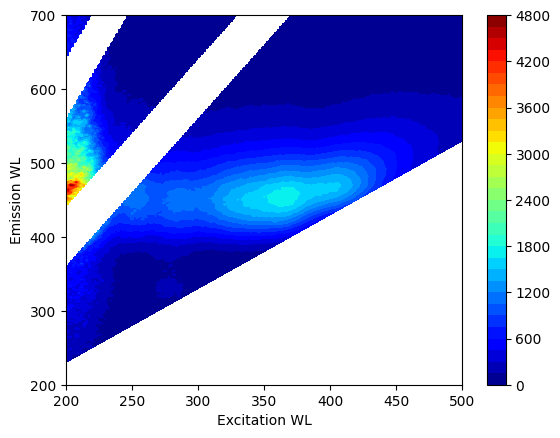

In [17]:
X, Y = np.meshgrid(ExWL, EmWL)

fig, ax = plt.subplots()
CS = ax.contourf(X, Y, rawFF[0, :, :], 40, cmap='jet')

cbar = fig.colorbar (CS, orientation="vertical") # カラーバーの表示 
cbar.ax.set_label("Fluorescence intensity") #カラーバーのラベル

plt.xlabel('Excitation WL')
plt.ylabel('Emission WL')

plt.show()